In [6]:
import mesa
import seaborn as sns
import numpy as np

In [7]:
# Import Cell Agent and OrthogonalMooreGrid
from mesa.discrete_space import CellAgent, OrthogonalMooreGrid


# Instantiate MoneyAgent as CellAgent
class MoneyAgent(CellAgent):
    """An agent with fixed initial wealth."""

    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell  # Instantiate agent with location (x,y)
        self.wealth = 1

    # Move Function
    def move(self):
        self.cell = self.cell.neighborhood.select_random_cell()

    def give_money(self):
        cellmates = [
            a for a in self.cell.agents if a is not self
        ]  # Get all agents in cell

        if self.wealth > 0 and cellmates:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        # Instantiate an instance of Moore neighborhood space
        self.grid = OrthogonalMooreGrid(
            (width, height), torus=True, capacity=10, random=self.random
        )

        # Create agents
        agents = MoneyAgent.create_agents(
            self,
            self.num_agents,
            # Randomly select agents cell
            self.random.choices(self.grid.all_cells.cells, k=self.num_agents),
        )

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [8]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

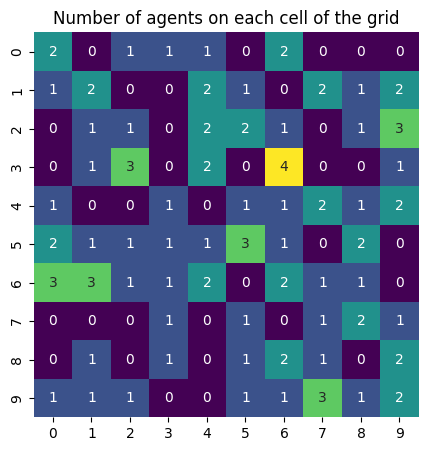

In [11]:
agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.all_cells:
    agent_counts[cell.coordinate] = len(cell.agents)
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(5, 5)
g.set(title="Number of agents on each cell of the grid");

In [ ]:
class ResourcePatch(mesa.Agent):
    """Passive patch with a certain amount of food that can regenerate."""
    def __init__(self, unique_id, model: mesa.Model, amount: float, max_amount: float, regen_rate: float):
        super().__init__(unique_id, model)
        self.amount = float(amount)
        self.max_amount = float(max_amount)
        # Per-step regeneration amount (absolute units). If 0, no regen.
        self.regen_rate = float(regen_rate)

    def step(self):
        if self.regen_rate <= 0:
            return
        self.amount = min(self.max_amount, self.amount + self.regen_rate)


class AntAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.energy = 100 # 100% Energie
        self.metabolism = 10 # Energy lost per step
        self.bite_size = 15# Max food taken from a patch per step
        self.reproduce_threshold = 
        self.reproduce_prob = 

    def move(self):
        # Verify agent has some wealth
        possible_steps = self.model.grid.get_neighborhood(self.pos, moore=True, include_center=True)
        new_pos = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_pos)
    
    def eat(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        patches = [a for a in cellmates if isinstance(a, ResourcePatch)]
        if not patches:
            return
        patch = patches[0]
        take = min(self.bite_size, patch.amount)
        if take > 0:
            patch.amount -= take
            self.energy += take


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n=10):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""
        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")